In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py,os, glob

In [13]:
ls -hrtl /UserData/maddalena/sacla2022/03-h5analysis/

total 2.3G
-rwxrwxrwx 1 maddalena maddalena  21M Oct 29 05:25 IqPhi_1192411_330573730_330574328.h5*
-rwxrwxrwx 1 maddalena maddalena  21M Oct 29 06:26 IqPhi_1192413_330809022_330809620.h5*
-rw-rw-r-- 1 maddalena maddalena  21M Oct 29 07:06 IqPhi_1192415_330953788_330954386.h5
-rw-rw-r-- 1 girelli   girelli    11M Oct 29 08:30 IqPhi_1192416_331209302_331209600.h5
-rw-rw-r-- 1 girelli   girelli    11M Oct 29 08:31 IqPhi_1192416_331209002_331209302.h5
-rw-rw-r-- 1 girelli   girelli   7.0M Oct 29 08:39 IqPhi_1192416_331209002_331209202.h5
-rw-rw-r-- 1 girelli   girelli   7.0M Oct 29 08:39 IqPhi_1192416_331209202_331209402.h5
-rw-rw-r-- 1 girelli   girelli   6.9M Oct 29 08:39 IqPhi_1192416_331209402_331209600.h5
-rw-rw-r-- 1 girelli   girelli    21M Oct 29 13:00 IqPhi_1192416_331209002_331209600.h5
-rw-rw-r-- 1 girelli   girelli    69M Oct 29 14:03 IqPhi_1192418_332242366_332244364.h5
-rw-rw-r-- 1 girelli   girelli    69M Oct 29 15:59 IqPhi_1192419_332292910_332294908.h5
-rw-rw-r-- 1 girell

In [39]:
# parameters for loading
run=1192422
def find_liquid_and_save(run):
    pathSave='/UserData/maddalena/sacla2022/03-h5analysis/'
    os.chdir(pathSave)
    files = glob.glob(f"IqPhi_{run}*.h5")
    f = h5py.File(files[0],'r')
    q = f['q'][:]
    Phi = f['phi'][:]

    I2d = []
    PulseEnergy = []
    PhotonEnergy = []
    tags = []
    shutter = []

    for file in files[1:]:
        f = h5py.File(pathSave+file,'r')
        I2d            += f['I']  
    #    PulseEnergy  += f['PulseEnergy'][:]
    #    PhotonEnergy += f['PhotonEnergy']
    #    tags         += f['tag']
    #    shutter      += f['shutter']
    #    print(np.shape(I2d))
    # get 1d I
    I2d=np.array(I2d)
    I2d[I2d==0]=np.nan
    I=np.nanmean(I2d[:,Phi>0,:],axis=1)

    #Hist of intensity not on the water peaks
    plt.figure()
    plt.hist(np.mean(I[:, :],axis=1))
    plt.xlabel('mean I')
    plt.ylabel('f(mean I)')
    plt.yscale('log')
    
    # definition of hits and miss
    miss=(np.mean(I[:,:],axis=1)<50)&(np.mean(I[:,:],axis=1)!=0)
    hits=(np.mean(I[:, :],axis=1)>150)&(np.mean(I[:,:],axis=1)<=1000)
    I_hits=I[hits,:]
    
    #print results
    #print(f'number of ice ={sum(ice)}')
    print(f'number of water= {sum(hits)}')
    print(f'number of bkg ={sum(miss)}' )
    #print(f'droplet hit rate = {(sum(hits)+sum(ice))/len(hits)}')
    print(f'liquid hit rate = {(sum(hits))/len(hits)}')
    #print(f'ice hit rate = {sum(ice)/len(hits)}')
    
    
    
    #plot ave hits and miss
    np.savez(f'/UserData/maddalena/sacla2022/05-processed_I/water_{run}.npz',hit_rate=(sum(hits))/len(hits),q=q,I=np.mean(I[hits,:],axis=0)-np.mean(I[miss,:],axis=0))

run 1192421
number of water= 106
number of bkg =53
liquid hit rate = 0.11674008810572688
run 1192422
number of water= 76
number of bkg =641
liquid hit rate = 0.08370044052863436
run 1192423
number of water= 209
number of bkg =2003
liquid hit rate = 0.07717872968980798
run 1192424
number of water= 222
number of bkg =3613
liquid hit rate = 0.04924578527062999
run 1192425
number of water= 110
number of bkg =8396
liquid hit rate = 0.012211367673179397
run 1192426
number of water= 37
number of bkg =8630
liquid hit rate = 0.004107460035523979


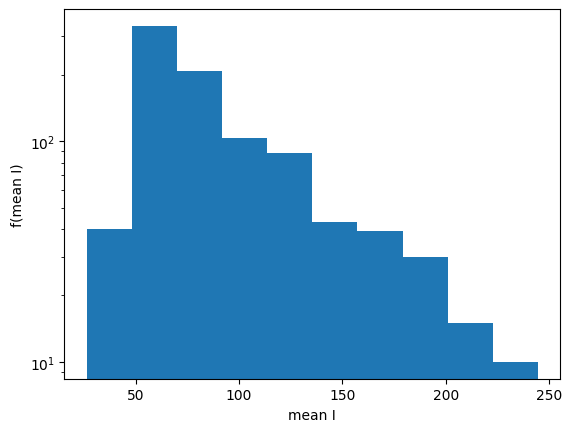

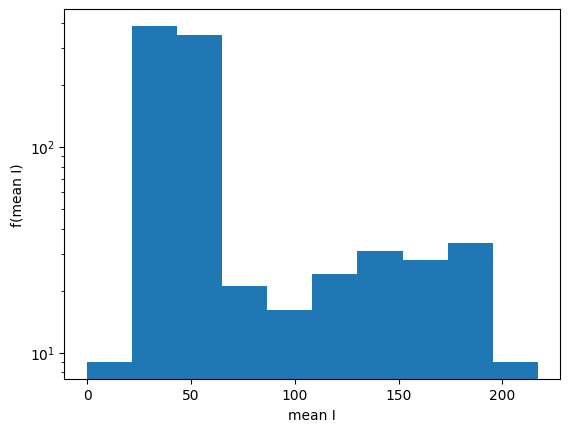

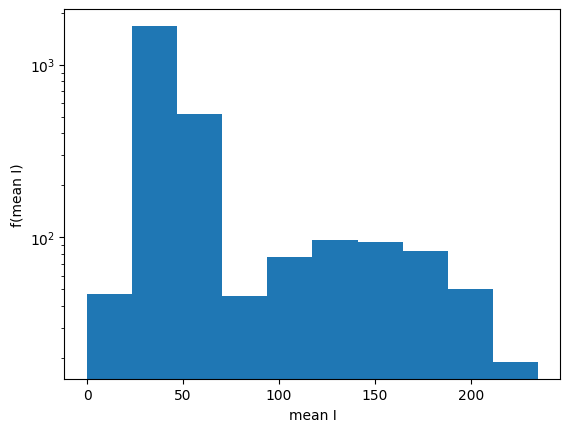

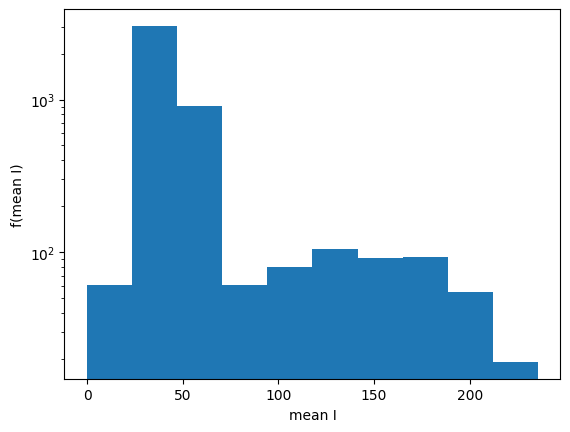

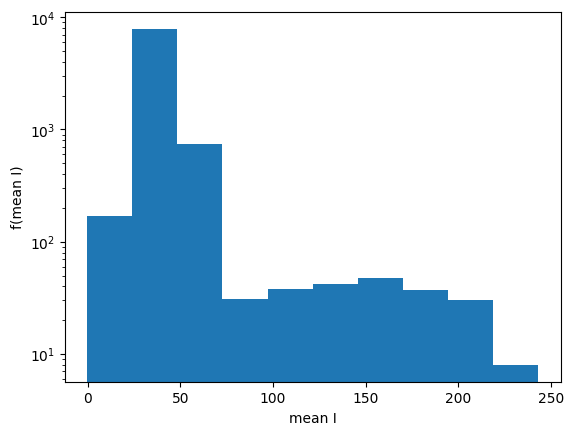

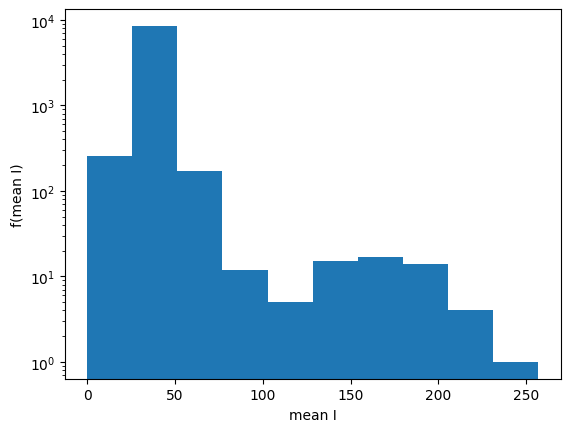

In [40]:
runs=np.arange(1192421,1192427)


for run in runs:
    print(f'run {run}')
    find_liquid_and_save(run)

Text(0.5, 0, '$q$ $\\rm (\\AA^{-1})$')

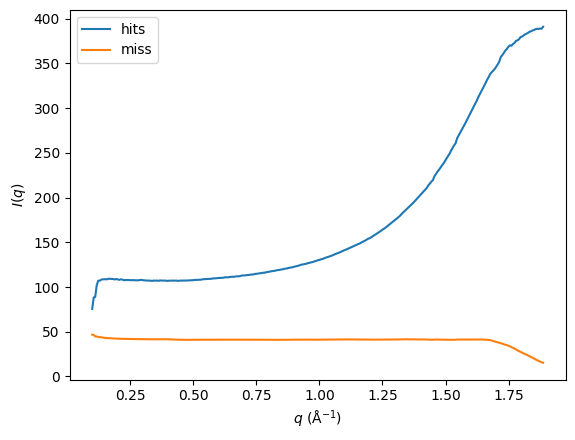

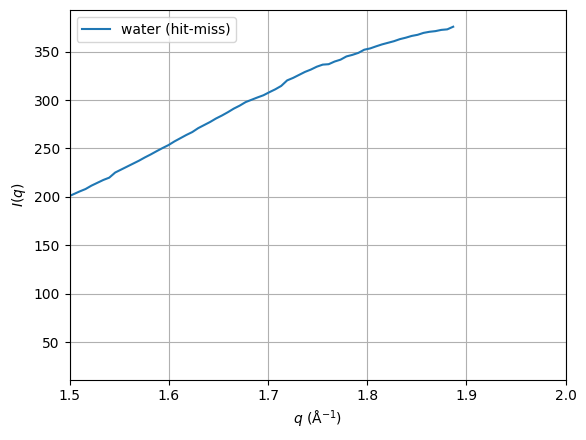

In [10]:
plt.figure()
plt.plot(q,np.mean(I[hits,:],axis=0),label='hits')
plt.plot(q,np.mean(I[miss,:],axis=0),label='miss')
plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$')

plt.legend()
#plot ave hits - miss which should be water
plt.figure()
plt.plot(q,np.mean(I[hits,:],axis=0)-np.mean(I[miss,:],axis=0),label='water (hit-miss)')
plt.xlim([1.5,2 ])
plt.grid('on')
plt.legend()

plt.ylabel(r'$I(q)$')
plt.xlabel(r'$q$ $\rm (\AA^{-1})$')

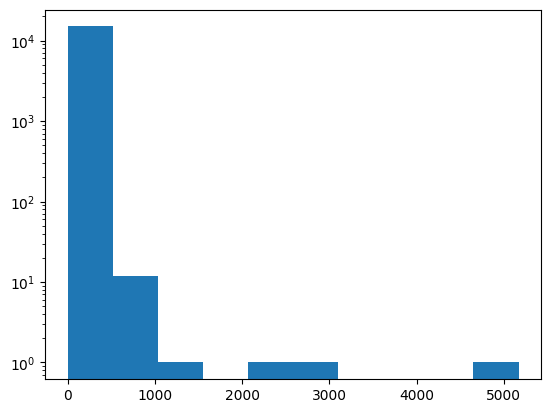

In [7]:
## histogram of the max in the intensity on the brag peak 
plt.figure()
plt.hist(np.max(I[:,(q>1.2)&(q<2.7)],axis=1) )
plt.yscale('log')
plt.ylabel(r'$f(I)$')
plt.xlabel(r'max $I(1.2<q<2)$')


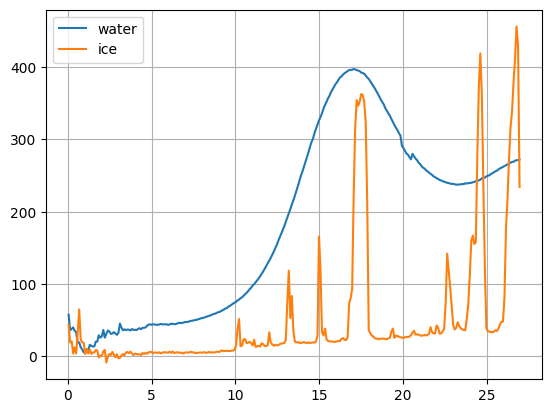

In [17]:
ice=(np.max(I[:,(q>1.)&(q<2.7)],axis=1)>800)&(np.max(I[:,(q>1.)&(q<2.7)],axis=1)<4300)
bkg=np.mean(I[miss,:],axis=0)
plt.figure()
plt.plot(q,np.mean(I[hits,:],axis=0)-bkg,label='water')
plt.plot(q,np.mean(I[ice,:],axis=0)-bkg,label='ice')
plt.grid('on')
plt.legend()

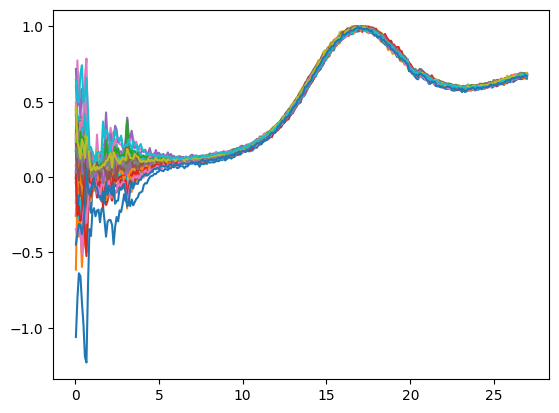

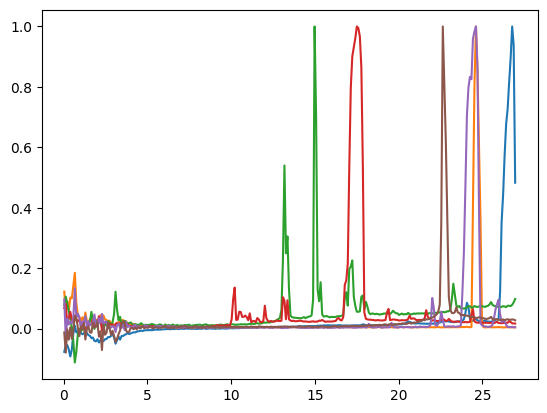

In [18]:
# plot all the liquids singularly

plt.figure()

bkg=np.mean(I[miss,:],axis=0)
I_hits=I[hits,:]
for i in range(np.size(I_hits,0)):
    I_corrected=I_hits[i,:]-bkg
    plt.plot(q,I_corrected/max(I_corrected))
    
    
# plot all the miss singularly
plt.figure()

I_miss=I[miss,:]
for i in range(np.size(I_hits,0)):
    I_corrected=I_miss[i,:]
    plt.plot(q,I_corrected/max(I_corrected))
    
    
    
# plot all the ice singularly
plt.figure()
I_ice=I[ice,:]
for i in range(np.size(I_ice,0)):
    I_corrected=I_ice[i,:]-bkg
    plt.plot(q,I_corrected/max(I_corrected))


In [15]:
print(f'number of ice ={sum(ice)}')
print(f'number of water= {sum(hits)}')
print(f'number of bkg ={sum(miss)}' )
print(f'droplet hit rate = {(sum(hits)+sum(ice))/len(hits)}')
print(f'liquid hit rate = {(sum(hits))/len(hits)}')
print(f'ice hit rate = {sum(ice)/len(hits)}')

number of ice =6
number of water= 41
number of bkg =14928
droplet hit rate = 0.0031333333333333335
liquid hit rate = 0.0027333333333333333
ice hit rate = 0.0004


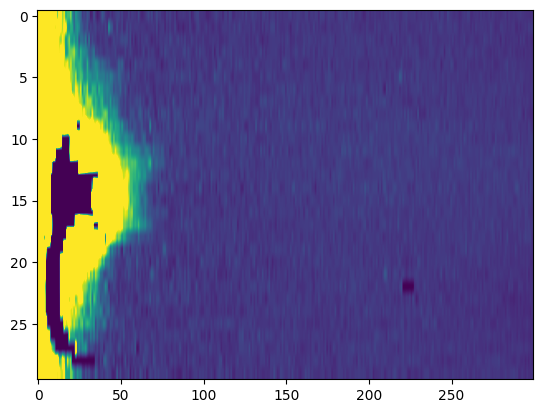

In [12]:
#plot 2d intensities

n=14000
plt.figure()

plt.imshow(I2d[n,:,:],aspect='auto',vmin=0,vmax=200)

(0.0, 600.0)

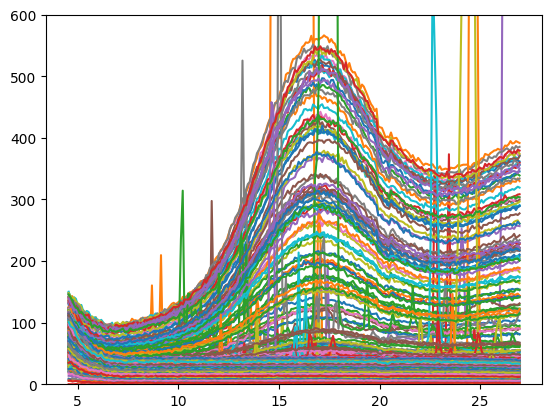

In [13]:
#plot all intensities

plt.figure()

for i in range(np.size(I,0)):

    plt.plot(q[50:],I[i,50:])
plt.ylim([0, 600])